# Ground-State: J1-J2 model

In [4]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update({'font.size': 18})

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import matplotlib.cm as cm

In [7]:
def stop(serie,calc_e,tol):
    total = len(serie)
    for i, energia in enumerate(serie):
        erro_absoluto = abs(energia - calc_e)
        if erro_absoluto < tol:
            break
    return energia,erro_absoluto,i,(i/len(serie)*100), total

In [8]:
def phase(a):
    if (a<29):
        return "AntiFerromagnetic Phase"
    elif (a>=29) and (a<166):
        return "Frustrated Phase"
    elif (a>=166) and (a<270):
        return "Ferromagnetic Phase"
    else:
        return "AntiFerromagnetic Phase"

In [9]:
def energy(line,df):
    line = line.replace("../../../../data/logs/t_","")
    line = line.replace(".log","")
    l    = line.split("_")
    n = l[0]; degree = l[1]; n_it = l[2]
    df_loc = df
    df_loc = df_loc[df_loc['l']      == int(n)]
    df_loc = df_loc[df_loc['degree'] == int(degree)]
    df_loc = df_loc[df_loc['n_it']   == int(n_it)]
    return list(df_loc['calc_energy'])[0], list(df_loc['exact_energy'])[0]   

In [10]:
def calc_energy_series(path):
    
    with open(path) as f:
        data = json.load(f)

    iters_list = data['Energy']['iters']
    energy_list = data['Energy']['Mean']['real']
    
    return iters_list,energy_list

In [11]:
def exact_energy(path,energy_list,tol):

    line = path.replace("../../../../data/logs/t_", "").replace(".log", "")
    ll = line.split("_") ; n, degree, n_it = ll[0], ll[1], ll[2]; l  = n
    df_loc = df[
        (df['l'] == int(n)) &
        (df['degree'] == int(degree)) &
        (df['n_it'] == int(n_it))
    ]

    calc_e = df_loc['calc_energy'].iloc[0]
    exac_e = df_loc['exact_energy'].iloc[0]
    
    e, error, stop_i, p, total = stop(energy_list,calc_e,tol);p_str = f"{p:.2f}"  

    return calc_e,exac_e,e, error, stop_i, p, total,l

In [12]:
dest   = "../../../../data/total/df_0504.csv"
df     = pd.read_csv(dest)

In [24]:
theta_list    = []; calc_list   = []; exac_list = [];  e_list     = [] 
error_list    = []; stop_i_list = []; p_list    = [];  total_list = []
energy_matrix = []

In [25]:
i = 0; path = "../../../../data/logs/t_14_" + str(i) + "_600_1200.log"; tol  = 0.085
print(path)
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

print(len(iters_list))

print(len(energy_list))

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 15; path = "../../../../data/logs/t_14_" + str(i) + "_600_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);


i = 30; path = "../../../../data/logs/t_14_" + str(i) + "_600_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 45; path = "../../../../data/logs/t_14_" + str(i) + "_600_1200.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)


calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

../../../../data/logs/t_14_0_600_1200.log
600
600


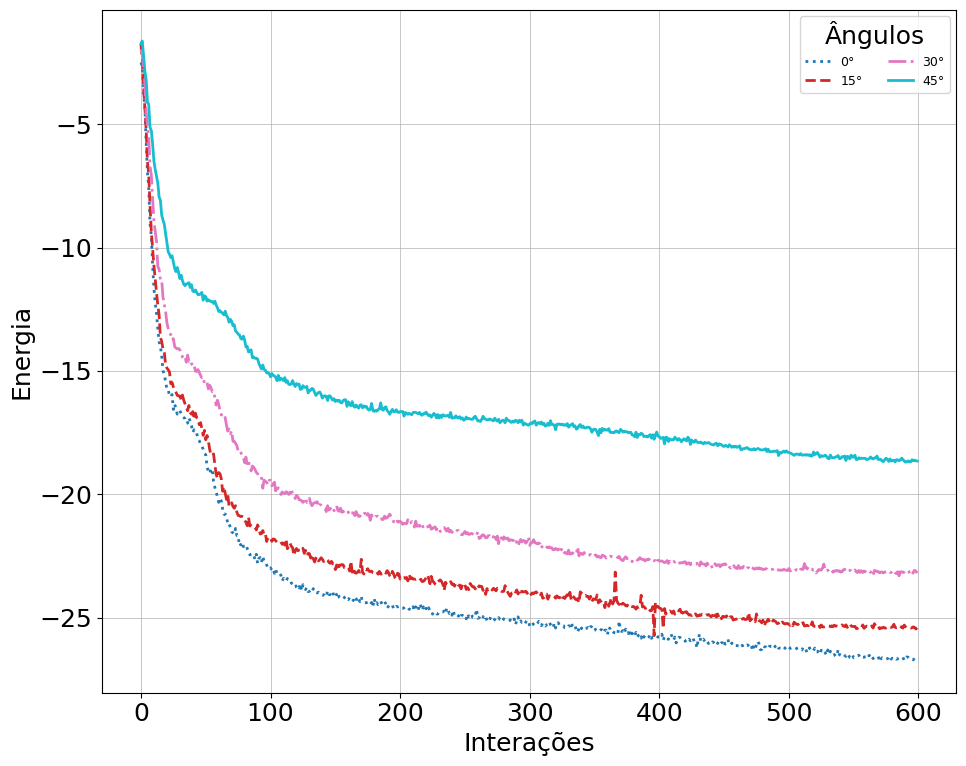

In [26]:
n_curvas = 4

colors = cm.tab10(np.linspace(0, 1, n_curvas))
linestyles = [':', '--', '-.', '-', (0, (5, 1)), (0, (3, 1, 1, 1)),
              (0, (1, 1)), (0, (5, 2, 1, 2)), (0, (4, 1, 2)), (0, (2, 2))]

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_ylabel('Energia')
ax1.set_xlabel('Interações') 
ax1.grid(lw=0.5)

for i in range(n_curvas):
    ax1.plot(iters_list, energy_matrix[i], lw=2,
             linestyle=linestyles[i % len(linestyles)],
             color=colors[i],
             label=f"{theta_list[i]}\u00b0")


ax1.legend(title='Ângulos', loc='upper right', ncol=2, fontsize=9)

plt.tight_layout()
plt.show()

In [23]:
theta_list    = []; calc_list   = []; exac_list = [];  e_list     = [] 
error_list    = []; stop_i_list = []; p_list    = [];  total_list = []
energy_matrix = []

In [18]:
i = 30; path = "../../../../data/logs/t_14_" + str(i) + "_300_1008.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 45; path = "../../../../data/logs/t_14_" + str(i) + "_300_1008.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);


i = 60; path = "../../../../data/logs/t_14_" + str(i) + "_300_1008.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 120; path = "../../../../data/logs/t_14_" + str(i) + "_300_1008.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)


calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

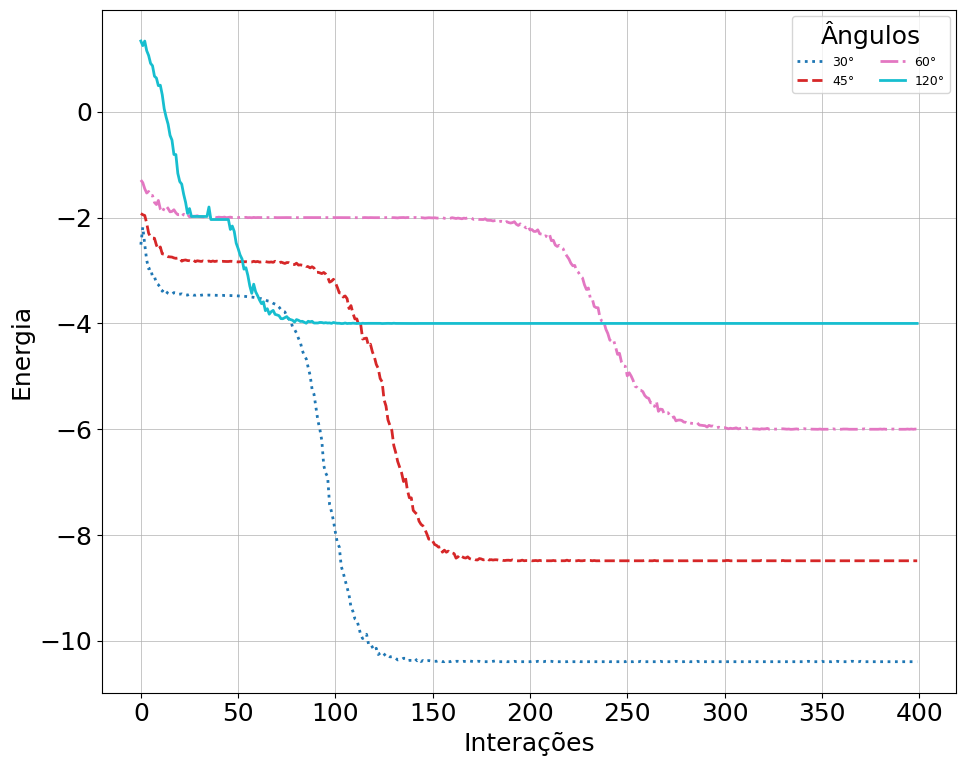

In [18]:
n_curvas = 4

colors = cm.tab10(np.linspace(0, 1, n_curvas))
linestyles = [':', '--', '-.', '-', (0, (5, 1)), (0, (3, 1, 1, 1)),
              (0, (1, 1)), (0, (5, 2, 1, 2)), (0, (4, 1, 2)), (0, (2, 2))]

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_ylabel('Energia')
ax1.set_xlabel('Interações') 
ax1.grid(lw=0.5)

for i in range(n_curvas):
    ax1.plot(iters_list, energy_matrix[i], lw=2,
             linestyle=linestyles[i % len(linestyles)],
             color=colors[i],
             label=f"{theta_list[i]}\u00b0")


ax1.legend(title='Ângulos', loc='upper right', ncol=2, fontsize=9)

plt.tight_layout()
plt.show()

In [19]:
theta_list    = []; calc_list   = []; exac_list = [];  e_list     = [] 
error_list    = []; stop_i_list = []; p_list    = [];  total_list = []
energy_matrix = []

In [20]:
i = 180; path = "../../../../data/logs/t_14_" + str(i) + "_300_1008.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 210; path = "../../../../data/logs/t_14_" + str(i) + "_300_1008.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);


i = 240; path = "../../../../data/logs/t_14_" + str(i) + "_300_1008.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

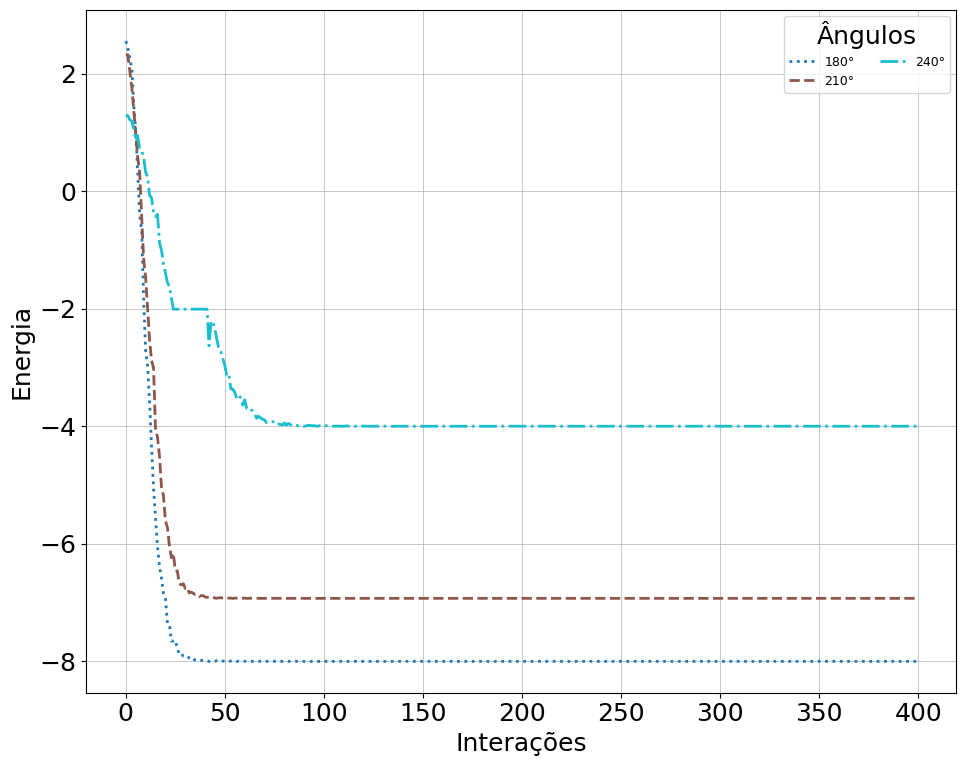

In [21]:
n_curvas = 3

colors = cm.tab10(np.linspace(0, 1, n_curvas))
linestyles = [':', '--', '-.', '-', (0, (5, 1)), (0, (3, 1, 1, 1)),
              (0, (1, 1)), (0, (5, 2, 1, 2)), (0, (4, 1, 2)), (0, (2, 2))]

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_ylabel('Energia')
ax1.set_xlabel('Interações') 
ax1.grid(lw=0.5)

for i in range(n_curvas):
    ax1.plot(iters_list, energy_matrix[i], lw=2,
             linestyle=linestyles[i % len(linestyles)],
             color=colors[i],
             label=f"{theta_list[i]}\u00b0")


ax1.legend(title='Ângulos', loc='upper right', ncol=2, fontsize=9)

plt.tight_layout()
plt.show()

In [27]:
theta_list    = []; calc_list   = []; exac_list = [];  e_list     = [] 
error_list    = []; stop_i_list = []; p_list    = [];  total_list = []
energy_matrix = []

In [28]:
i = 300; path = "../../../../data/logs/t_14_" + str(i) + "_300_1008.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

i = 60; path = "../../../../data/logs/t_14_" + str(i) + "_300_1008.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);


i = 240; path = "../../../../data/logs/t_14_" + str(i) + "_300_1008.log"; tol  = 0.085
iters_list,energy_list = calc_energy_series(path)
energy_matrix.append(energy_list)

calc_e,exac_e,e, error, stop_i, p, total,l = exact_energy(path,energy_list,tol)
p_str = f"{p:.2f}" 
theta_list.append(i);calc_list.append(calc_e); exac_list.append(exac_e);  
e_list.append(e); 
error_list.append(error);  
stop_i_list.append(stop_i);  
p_list.append(p_str);   
total_list.append(total);

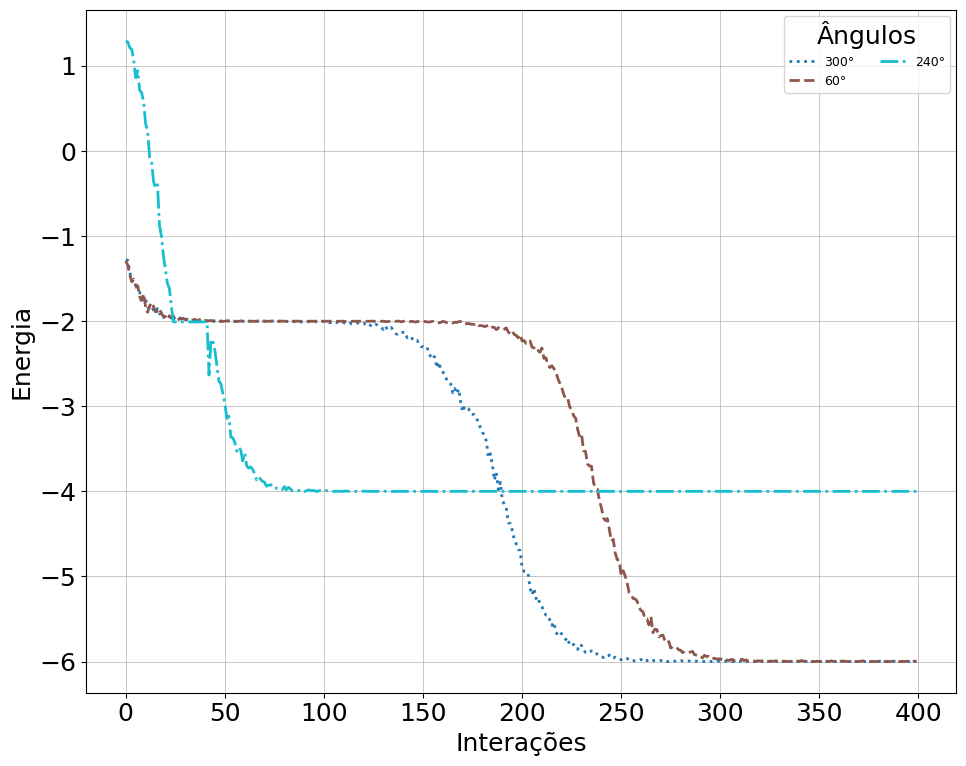

In [29]:
n_curvas = 3

colors = cm.tab10(np.linspace(0, 1, n_curvas))
linestyles = [':', '--', '-.', '-', (0, (5, 1)), (0, (3, 1, 1, 1)),
              (0, (1, 1)), (0, (5, 2, 1, 2)), (0, (4, 1, 2)), (0, (2, 2))]

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_ylabel('Energia')
ax1.set_xlabel('Interações') 
ax1.grid(lw=0.5)

for i in range(n_curvas):
    ax1.plot(iters_list, energy_matrix[i], lw=2,
             linestyle=linestyles[i % len(linestyles)],
             color=colors[i],
             label=f"{theta_list[i]}\u00b0")


ax1.legend(title='Ângulos', loc='upper right', ncol=2, fontsize=9)

plt.tight_layout()
plt.show()